In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)


In [3]:
x_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,1.392183,1.270486,-1.288570,-0.275106,-0.036322,-1.158147,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.989963,-1.355282,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
1,-1.188910,-0.926810,-1.361242,-0.275106,-0.731251,-1.275919,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.466451,0.538139,0.615438,-1.082558,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.188910,0.352213,1.400316,-0.275106,0.244469,0.455762,-0.252011,-0.037627,-0.084038,0.046557,0.081929,0.683805,-0.047383,0.615438,-1.082558,-0.049038,-0.245190,-0.252011,0.081929
3,0.140744,-1.221970,-0.125808,-0.275106,-0.086734,1.853757,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.934874,0.135089,-0.885307,1.100205,-0.271794,-1.358972,-0.427943,-0.084662
4,0.062529,-1.156379,-1.724605,-0.275106,-2.430631,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.013147,-1.110017,0.615438,-0.363967,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330172,0.375389,-0.369287,1.424540,-0.275106,0.820144,0.998821,6.068185,-0.134782,-0.073029,6.259835,0.356177,-0.740830,0.149580,-0.885307,1.106191,2.495277,12.476386,-0.134782,6.259835
330173,1.392183,-0.598856,-0.610292,-0.275106,-1.946565,-0.460240,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.981996,-1.434711,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
330174,-0.641405,0.516190,1.109625,-0.275106,-0.264532,1.286708,3.053010,-0.173069,-0.061488,1.131793,0.261853,0.503592,0.325612,-0.885307,1.052305,0.842420,4.212100,-0.173069,3.053010
330175,-0.484975,-1.123583,-0.464947,-0.275106,-2.517904,-0.763393,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.525052,-0.722532,0.615438,-1.304202,-0.271794,-1.358972,-0.427943,-0.084662


In [35]:
parameters = {'alpha':[0.01, 0.1, 1, 10, 25, 50, 75, 100, 150, 200,250]}

In [36]:
reg = Ridge()

In [37]:
Ridge_reg= GridSearchCV(reg, parameters, scoring='neg_mean_squared_error',cv=5)

In [38]:
Ridge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 25, 50, 75, 100, 150, 200,
                                   250]},
             scoring='neg_mean_squared_error')

In [39]:
print(Ridge_reg.best_estimator_)

Ridge(alpha=100)


In [40]:
best_model = Ridge_reg.best_estimator_
best_model.fit(x_train,y_train)

Ridge(alpha=100)

In [41]:
best_model.score(x_test, y_test)

0.09462281766950287

In [42]:
y_pred = best_model.predict(x_test)

In [43]:
print("Coefficients: \n", best_model.coef_)
print('Intercept: \n', best_model.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-0.58184045  0.32883614 -0.27443933  0.02874956  0.11209674  0.03138958
   0.06769852 -0.06508981  0.08552542 -0.1322848   0.08814415 -0.4256921
  -0.1872761   0.53991886  3.19048489  0.00879869  0.04399347  0.8263968
  -0.00456848]]
Intercept: 
 [20.18322732]
Mean squared error: 89.37
Coefficient of determination: 0.09


In [53]:
train_sizes = [1, 25, 50, 100, 500, 2500, 7500, 15000]

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = best_model,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [55]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-67.68218669 -87.08037797 -87.08037797 -87.08037797 -87.08037797]
 [-71.90965939 -77.6178748  -77.6178748  -77.6178748  -77.6178748 ]
 [-80.1051826  -88.90076229 -88.90076229 -88.90076229 -88.90076229]
 [-80.68490308 -84.54491932 -84.54491932 -84.54491932 -84.54491932]
 [-90.05025208 -91.17410801 -91.17410801 -91.17410801 -91.17410801]
 [-89.98836877 -90.25646    -90.25646    -90.25646    -90.25646   ]
 [-88.72367671 -89.29878403 -89.29878403 -89.29878403 -89.29878403]]

 ----------------------------------------------------------------------

Validation scores:

 [[-108.76556472 -114.69182139 -114.97285315 -115.25951927 -115.75151011]
 [ -95.16506658 -102.37384852 -102.63503262 -102.35908193 -102.87521503]
 [ -95.93634008 -100.16082454 -100.51501316  -99.98710674 -100.65873316]
 [ -95.57292956  -94.61453094  -95.02671043  -94.52970478  -95.34289237]
 [ -92.16332192  -92.72302428  -92.88082845  -92.

In [56]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1        -0.000000
25       83.200740
50       76.476232
100      87.141646
500      83.772916
2500     90.949337
7500     90.202842
15000    89.183763
dtype: float64

 --------------------

Mean validation scores

 1        113.888254
25       101.081649
50        99.451604
100       95.017354
500       92.806197
2500      90.171790
7500      89.669562
15000     89.616380
dtype: float64


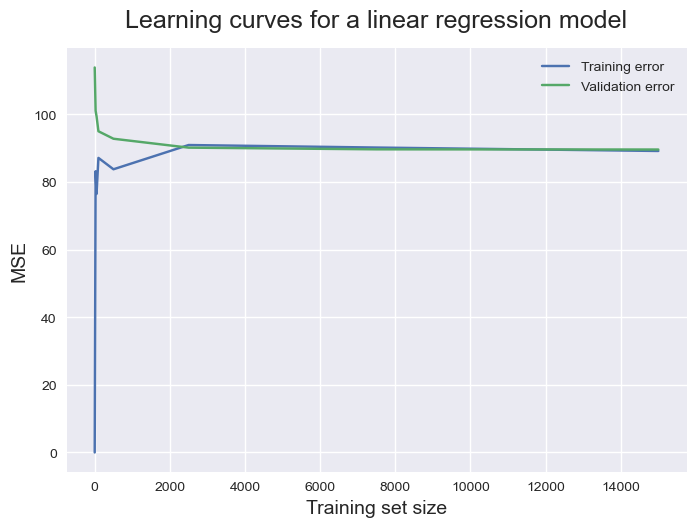

In [57]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()


(0.0, 3000.0)

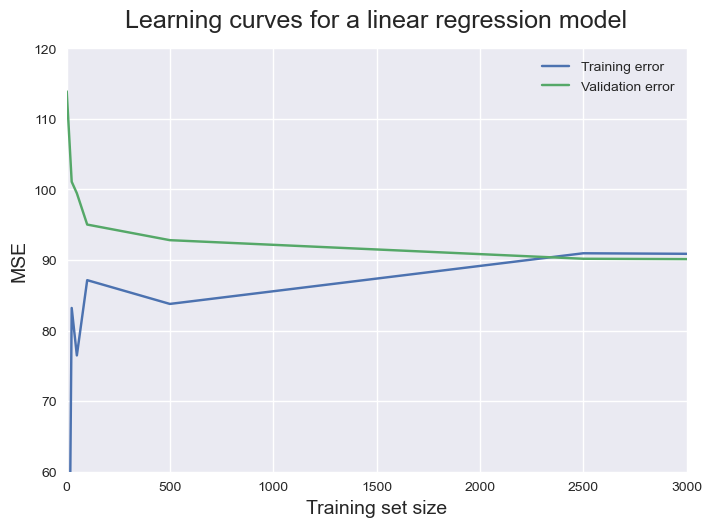

In [60]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(60,120)
plt.xlim(0,3000)

Predict for submission

In [44]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [45]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [46]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842


In [47]:
y_pred = best_model.predict(submission_test)
y_pred

array([[20.62026895],
       [20.6309955 ],
       [20.64172205],
       ...,
       [18.91188146],
       [18.93333457],
       [18.94406112]])

In [48]:
weekly_sales = y_pred[:,0]**3
weekly_sales

array([8767.64538865, 8781.33515187, 8795.03915777, ..., 6764.00953802,
       6787.05436308, 6798.59637795])

In [49]:
weekly_sales[0]

8767.645388651232

In [50]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
ridge_submission = pd.DataFrame(data=sub)

ridge_submission['Weekly_Sales'] = round(ridge_submission['Weekly_Sales'], 2)

ridge_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,8767.65
1,1_1_2012-11-09,8781.34
2,1_1_2012-11-16,8795.04
3,1_1_2012-11-23,8808.76
4,1_1_2012-11-30,8822.49
...,...,...
115059,45_98_2013-06-28,6741.02
115060,45_98_2013-07-05,6752.51
115061,45_98_2013-07-12,6764.01
115062,45_98_2013-07-19,6787.05


In [51]:
ridge_submission['Weekly_Sales'][1]

8781.34

In [52]:
ridge_submission.to_csv('Submission Files/Ridge.csv', float_format='%.2f',index=False)